In [2]:
import numpy as np
import pylab as plt
import swyft
import torch
%load_ext autoreload
%autoreload 2

In [3]:
DEVICE = 'cuda:0'

In [4]:
def model(z):
    x = z
    return x

In [5]:
def noisemodel(x, z, sigma = 0.1):
    x = x + np.random.randn(*x.shape) * sigma
    return x

In [6]:
z0 = np.array([0.5])
zdim = len(z0)
comb1d = [[0]]
x0 = model(z0)
print(x0, zdim)

[0.5] 1


In [7]:
# Instantiate network

ds = swyft.DataStore().init(zdim = zdim, xdim = (zdim,))

Creating empty datastore: None
...don't forget to run `init` to set up storage parameters.
Datastore initialized.


In [15]:
MAX_EPOCHS = 10
NSAMPLES = 10000
Head = None

In [16]:
td = swyft.TrainData(x0 = x0, zdim = zdim, noisehook = noisemodel, datastore = ds, nsamples = NSAMPLES)
ds.simulate(model)

Constrained posterior area: 1.0
Adding 8941 new samples. Run simulator!


Simulate: 100%|██████████| 8941/8941 [00:04<00:00, 2136.56it/s]


In [17]:
re = swyft.RatioEstimation(zdim, td, device = DEVICE, combinations = comb1d, head = Head)

In [18]:
re.train(max_epochs = MAX_EPOCHS, nbatch = 32, lr_schedule = [1e-2, 1e-3])

Start training
LR iteration 0
Total epochs: 4
LR iteration 1


KeyboardInterrupt: 

100%|██████████| 16/16 [00:00<00:00, 543.25it/s]


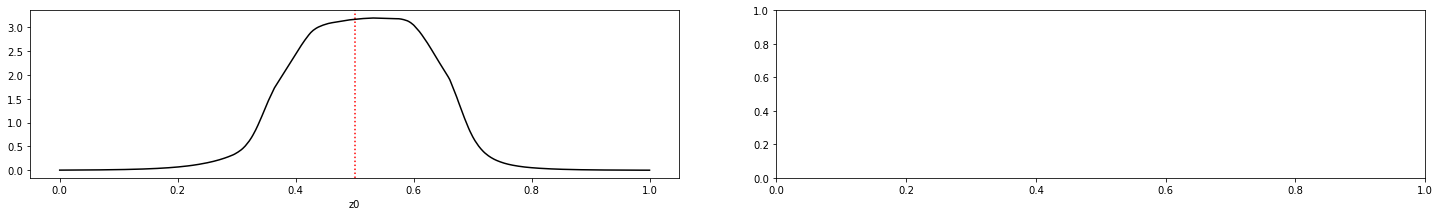

In [14]:
swyft.plot1d(re, x0 = x0, z0 = z0, cmap = 'Greys', dims = (25, 3), ncol = 2, params = [0])

In [26]:
ds = td.get_dataset()

In [27]:
DS = np.array([[ds[i]['x'].numpy()[0], ds[i]['z'].numpy()[0]] for i in range(len(ds))])

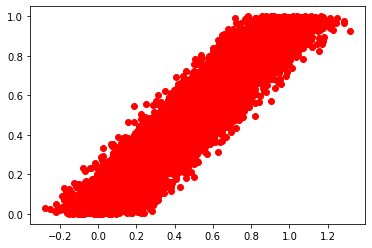

In [29]:
plt.scatter(DS[:,0], DS[:,1], color = 'red')